# Multivariet Imputation

***Multivariet Imputation is a process of filling missing values in a column by considering all the other features.***

There are so many mutlivarient imputation tecniques. Most important are : 
1. KNN Imputer
2. Iterative Imputer / MICE Imputer

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic_toy.csv')

df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

## 1. KNN Imputer

***KNN Imputer is a technique to handle missing values in a dataset. It finds the 'k' nearest neighbors to a data point with a missing value and uses their values to impute (fill in) the missing data. The neighbors are identified by a distance metric like Euclidean distance.***

**Steps to Implement**

1. **Select columns**: Isolate the numerical columns you want to impute.
2. **Handle Categorical Data**: If your data has categorical features, you must first one-hot encode them to convert them into a numerical format.
3. **Choose 'k'**: Decide on the number of neighbors, 'k'. A small, odd number like 3 or 5 is a common starting point.
4. **Instantiate KNNImputer**: Create an instance of the KNNImputer class, specifying your chosen 'k'.
5. **fit_transform**: Apply the imputer to your numerical data using fit_transform(). This will return a NumPy array with the missing values filled.
6. **Update DataFrame**: Assign the imputed values from the NumPy array back to your original DataFrame.


**When to Use**

1. **Small to medium-sized datasets**: It's computationally expensive for large datasets.
2. **Missing data is random**: It works best when the missing values don't follow a specific pattern.
3. **High imputation accuracy is needed**: It's more accurate than simple methods like mean/median imputation.


**Advantages**

1. **High Accuracy**: Provides more accurate imputations by using relationships between features.
2. **Maintains Data Integrity**: Preserves the distribution of the data.
3. **Multivariate**: Considers all features to find the best neighbors.


**Disadvantages**

1. **Computationally Slow**: Can be very time-consuming for large datasets.
2. **Sensitive to Outliers**: Outliers can skew the distance calculations and affect accuracy.
3. **Requires Scaling**: Performance is highly dependent on feature scaling.


We can import KNNImputer for impute modeule from sklearn : 
https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html


In [58]:
from sklearn.impute import KNNImputer

In [10]:
knn_imputer = KNNImputer(n_neighbors = 3,weights = 'distance',metric = 'nan_euclidean')

In [11]:
knn_imputed_values = knn_imputer.fit_transform(df) 

In [25]:
df[['Age_Knn','Fare_Knn']] = knn_imputed_values[:,0:2]

In [26]:
df.head()

,Age,Fare,Family,Survived,Age_Knn,Fare_Knn
0,22.0,7.2500,1,0,22.0,7.2500
1,38.0,71.2833,1,1,38.0,71.2833
2,26.0,7.9250,0,1,26.0,7.9250
3,35.0,53.1000,1,1,35.0,53.1000
4,35.0,8.0500,0,0,35.0,8.0500


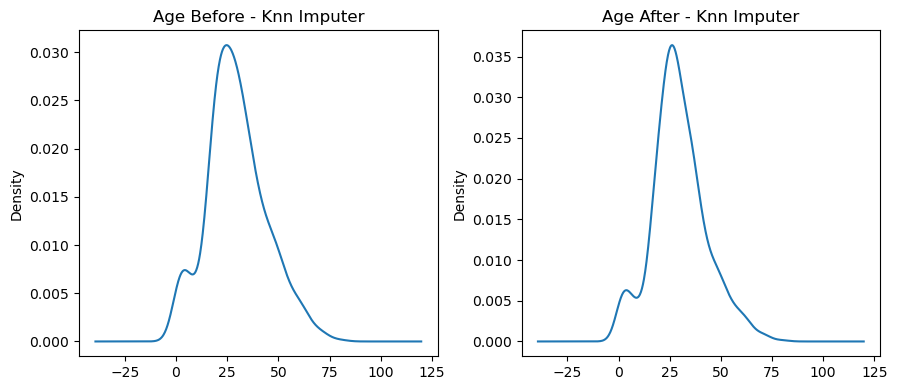

In [59]:
# checking distributions of Age before and after KNN Imputation

plt.figure(figsize = (9,4))

plt.subplot(1,2,1)
df['Age'].plot(kind = 'kde')
plt.title("Age Before - Knn Imputer")

plt.subplot(1,2,2)
df['Age_Knn'].plot(kind = 'kde')
plt.title("Age After - Knn Imputer")

plt.tight_layout()
plt.show()

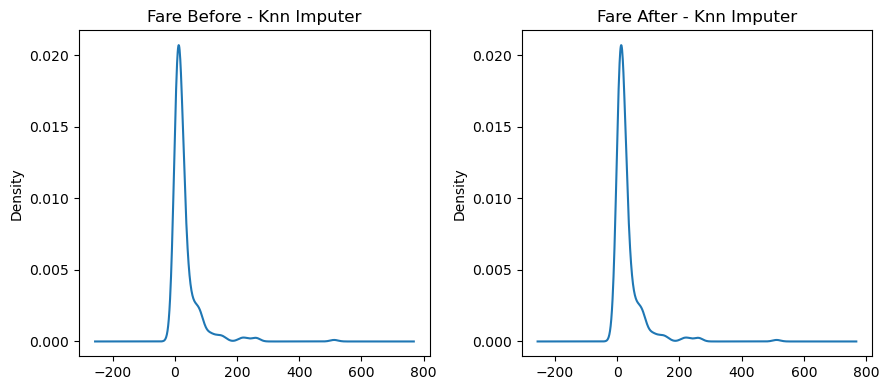

In [33]:
# checking distributions of Fare before and after KNN Imputation

plt.figure(figsize = (9,4))

plt.subplot(1,2,1)
df['Fare'].plot(kind = 'kde')
plt.title("Fare Before - Knn Imputer")

plt.subplot(1,2,2)
df['Fare_Knn'].plot(kind = 'kde')
plt.title("Fare After - Knn Imputer")

plt.tight_layout()
plt.show()

## 2. Iterative Imputer / MICE Imputer

***Iterative Imputer, or MICE, is a multivariate imputation method. It's iterative, meaning it fills in missing data for one feature using other features, then moves to the next, and repeats the process until the values stabilize. It's essentially a round-robin approach.***


**Steps**

1. **Enable Experimental Feature**: Import enable_iterative_imputer from sklearn.experimental.
2. **Pre-process**: Convert categorical features to numerical (e.g., using one-hot encoding).
3. **Choose Estimator**: Select a regression model (like the default BayesianRidge or RandomForestRegressor) to predict missing values.
4. **Instantiate & Transform**: Initialize IterativeImputer and apply fit_transform() to your data.
5. **Update DataFrame**: Assign the resulting imputed values back to your original DataFrame.


**When to Use**

1. Missing at Random (MAR) data.
2. High imputation accuracy is critical.
3. Dataset with correlated features.
4. High percentage of missing data.

**Advantages**

1. **Very accurate**: Models relationships between variables for better imputation.
2. **Flexible**: Allows different regression estimators.
3. **Preserves variance**: Accounts for uncertainty in imputed values.


**Disadvantages**

1. **Slow**: Computationally intensive due to its iterative nature.
2. **Sensitive to outliers**: Outliers can negatively impact the regression models.
3. **Complex setup**: Requires proper pre-processing and estimator selection.

We can import IterativeImputer for impute module from sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [37]:
from sklearn.experimental import enable_iterative_imputer

In [39]:
from sklearn.impute import IterativeImputer

In [40]:
iterative_imputer = IterativeImputer(initial_strategy = 'mean',imputation_order = 'ascending')

In [41]:
iterative_imputer_values = iterative_imputer.fit_transform(df)

In [53]:
df[['Age_Iterative','Fare_Iterative']] = iterative_imputer_values[:,0:2]

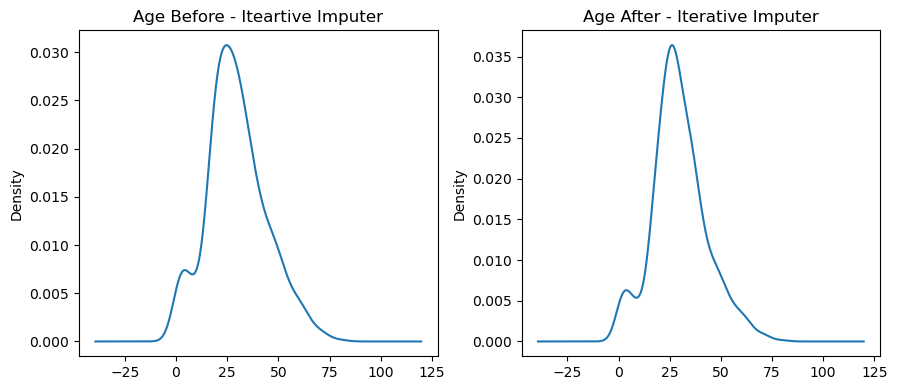

In [54]:
# checking distributions of Age before and after Iterative Imputation
plt.figure(figsize = (9,4))

plt.subplot(1,2,1)
df['Age'].plot(kind = 'kde')
plt.title("Age Before - Iteartive Imputer")

plt.subplot(1,2,2)
df['Age_Iterative'].plot(kind = 'kde')
plt.title("Age After - Iterative Imputer")

plt.tight_layout()
plt.show()

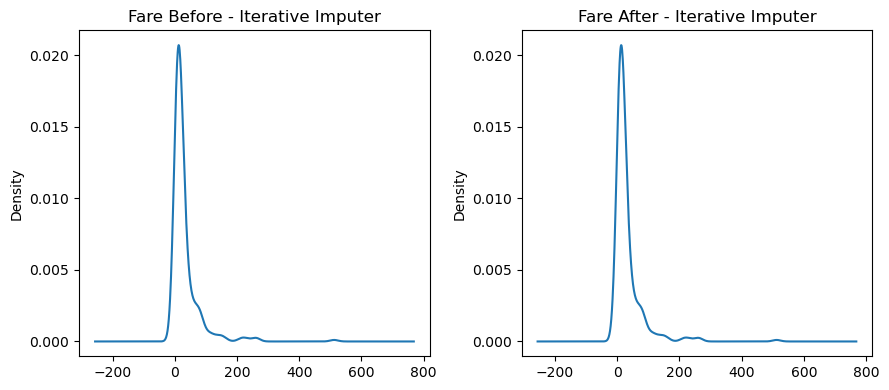

In [55]:
# checking distributions of Fare before and after Iterative Imputation
plt.figure(figsize = (9,4))

plt.subplot(1,2,1)
df['Fare'].plot(kind = 'kde')
plt.title("Fare Before - Iterative Imputer")

plt.subplot(1,2,2)
df['Fare_Iterative'].plot(kind = 'kde')
plt.title("Fare After - Iterative Imputer")

plt.tight_layout()
plt.show()